In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("train.csv")
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


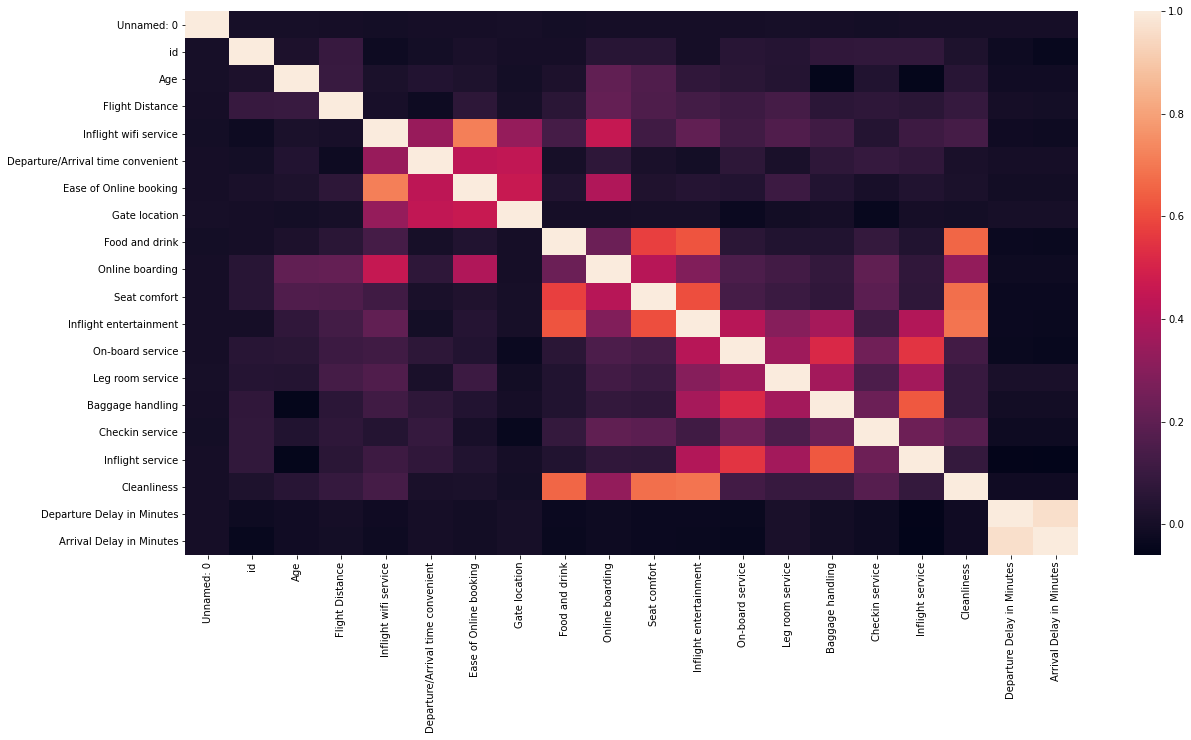

In [4]:
#check the correlation among the data
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c)

In [5]:
df.drop(['Arrival Delay in Minutes','Class'], axis=1, inplace=True)

In [6]:
df.head(5)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,460,3,4,3,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,235,3,2,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,562,2,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,214,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied


In [7]:
#install factor analyzer modul
#!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer

In [8]:
#Subset of the data, the 14 columns containing the survey answers
x =df[df.columns[6:20]] 


In [9]:
fa = FactorAnalyzer()
fa.fit(x, 10)

FactorAnalyzer(rotation_kwargs={})

In [10]:
ev, v = fa.get_eigenvalues()
ev

array([3.47460753, 2.32753739, 1.87688179, 1.11982655, 0.94867075,
       0.911874  , 0.69120616, 0.53988526, 0.49477839, 0.46265754,
       0.36863288, 0.31738585, 0.25404277, 0.21201313])

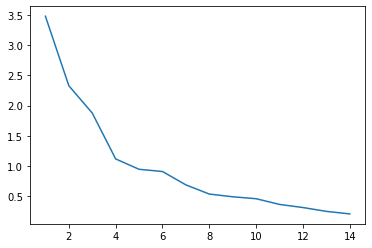

In [11]:
plt.plot(range(1,x.shape[1]+1),ev)

In [12]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(loads)#higher a factor loading, more important in the variable or factor usually we see the cutoff as 0.5

[[ 0.10011605  0.03270963  0.16290453]
 [ 0.11711458  0.74752012  0.20984581]
 [ 0.06431814  0.50838919 -0.03329373]
 [ 0.01661908  0.92737149  0.07571928]
 [-0.02747264  0.51043568 -0.03561914]
 [-0.00252644 -0.02040017  0.72233718]
 [ 0.09969206  0.34298244  0.44200616]
 [ 0.0572833  -0.00723618  0.81263157]
 [ 0.44521007 -0.01447287  0.7391309 ]
 [ 0.69666452  0.02465682  0.12499176]
 [ 0.47907895  0.07703222  0.10233216]
 [ 0.7654474   0.02873745  0.038456  ]
 [ 0.28288885  0.02548823  0.14232182]
 [ 0.79946508  0.01925971  0.03533499]]


In [14]:
#to know the factrors create are good or bad
!pip install pingouin
import pingouin as pg

In [19]:
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]

In [20]:
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.8762877916624101, array([0.875, 0.878])) (0.794291693309021, array([0.792, 0.796])) (0.7679754211110688, array([0.766, 0.77 ]))


In [21]:
new_variables = fa.fit_transform(x)

In [22]:
new_variables

array([[ 0.59396772,  0.02278305,  1.14862171],
       [-0.42268846,  0.19286617, -1.83615877],
       [ 0.30841676, -0.76104917,  1.35443658],
       ...,
       [ 0.35033986, -1.24826698,  0.55749678],
       [-0.23279523, -0.98424224, -1.93392001],
       [-0.66590337,  0.08607765, -1.88673589]])